In [83]:
using Plots
using LinearAlgebra

In [77]:
include("../aux_functions/aux_functions_Interpolate.jl")
include("../aux_functions/aux_functions_shapes.jl")
include("../aux_functions/aux_functions_grid.jl")


get_index_and_y_alt! (generic function with 1 method)

## 1D

In [118]:
J = (40,)
Box = (0.0, 1.0)
dx = differentials(Box,J)

xv = [(i-1)*dx[1] for i in 1:J[1]]

m=3
vector = sin.(2π*m*xv)
#vector = ones(J)



order = 5

x = 0.3111

f1(x) = Interpolate_1(order, vector, x, J[1], Box[2]) 
f2(x) = Interpolate_2(order, vector, x, J[1], Box[2]) 
#f_per(x) = Interpolate_per(order, vector, x, J[1],Box[2]) # NOT WORKING!
f1_D(x) = Interpolate_1(order, vector, x, J, Box)

fe(x) = sin(2π*m*x)

fe (generic function with 2 methods)

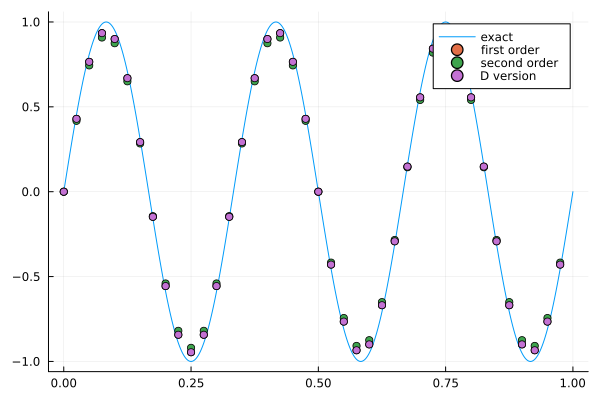

In [119]:
xp = 0.0:0.001:1.0
#plot(xp,f1.(xp))
plot(xp,sin.(2π*m*xp), label="exact")
scatter!(xv,f1.(xv), label="first order")
scatter!(xv,f2.(xv), label="second order")
scatter!(xv,f1_D.(xv), label="D version")
#scatter!(xv,f_per.(xv), label="per")

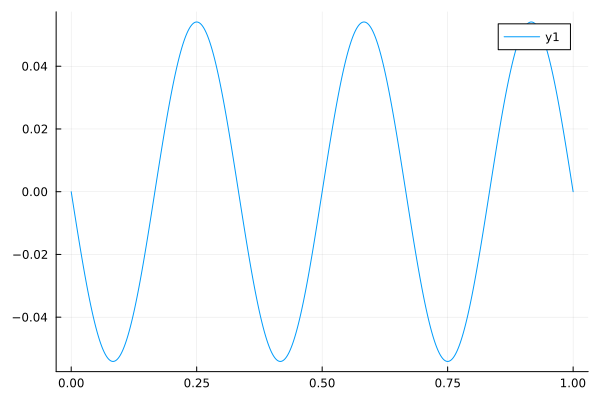

In [120]:
plot(xp,f1.(xp) - sin.(2π*m*xp))

plot(f)

In [82]:
maximum(abs.(f1.(xp) - f1_D.(xp)))

0.0

### 2D

In [127]:
include("../aux_functions/aux_functions_Interpolate.jl")
#J = (40,4000) # this reproduces well the 1D
#k = 2π*[3,1]
#J = (4000,160) # this case also
#k = 2π*[1,3]

J = (100,400)
k = 2π*[3,3]

Box = (0.0, 1.0, -1.0, 3.0)
dx = differentials(Box,J)

xv = [(i-1)*dx[1] for i in 1:J[1]]
yv = [(i-1)*dx[2] for i in 1:J[2]]

vector = sin.(k[1]*xv)*sin.(k[2]*yv)'
#vector = ones(J)



order = 5

x = [0.3111,0.30]

f1_D(x) = Interpolate_1(order, vector, x, J, Box)

fe(x,y) = sin(k[1]*x)*sin(k[2]*y)

#vector

fe (generic function with 2 methods)

In [128]:
f1_D(x) - fe(x[1],x[2])

-0.004212926978877235

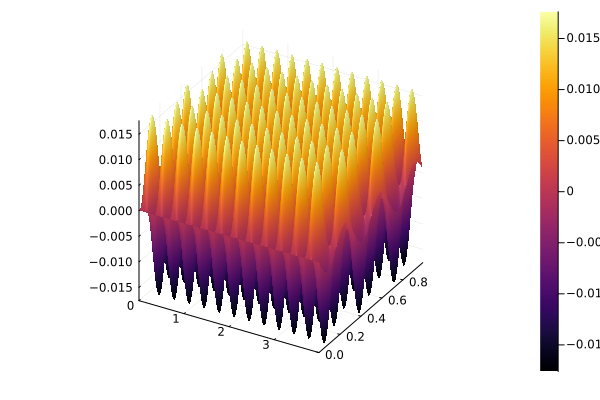

In [129]:
#surface(yv,xv,fe)

ff1_D(x,y) = f1_D([x,y])

diff(x,y) = fe(x,y) - f1_D([x,y])

surface(yv,xv,diff)